# Quick-Start Guide for Assignment 1

The assignment details can be found at the end of this notebook. 

To complete the assignment, continue writing your code within this notebook. Once you've finished, download the notebook as a _.pynb_ file and submit it via itsLearning.

Feel free to delete any cells you don't need.

In [45]:
# Your environment is probably missing some packages. We will check and, if necessary, install.
# https://pypi.org/project/yfinance
import pkg_resources
import subprocess, sys

In [46]:
def install(package):
    subprocess.run([sys.executable, "-m", "pip", "install", '--user', package])
installed_pkgs = '; '.join([str(p) for p in pkg_resources.working_set])
needed_pkgs = [
    "yfinance", 
    # "lxml"
]
for pkg in needed_pkgs:
    if pkg not in installed_pkgs:
        install(pkg)

## <span style="color:red"> Restart the kernel after package installs </span>

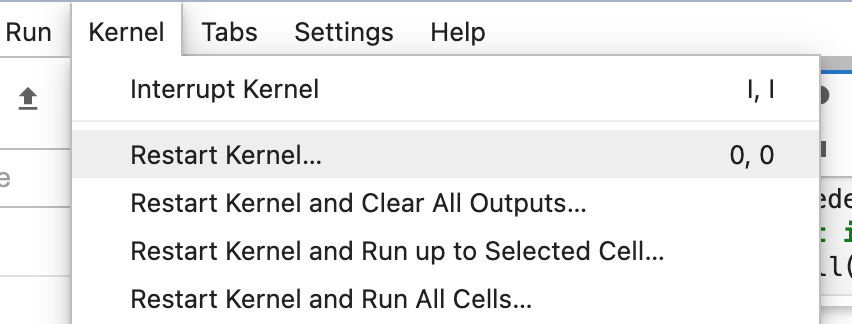

In [47]:
# Let's see which python version is used in this environment
sp = subprocess.run([sys.executable, '--version'], capture_output=True)
print(sys.executable)
print(sp.stdout.strip().decode("utf-8"))

/opt/conda/bin/python
Python 3.10.6


In [48]:
# Now we can import yfinance (you may need to restart the kernel)
import yfinance as yf
import pandas as pd
from pathlib import Path

In [49]:
# Let's define some useful constants
START = "2000-07-03"
END   = "2023-07-03"

TICKERS = ['AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AKAM', 'AMD', 'ANSS', 'APH', 'AVIFY', 'BA', 'BCE',  
           'CDNS', 'CGNX', 'CHKP', 'CSCO', 'CSGP', 'CTSH', 'DASTY', 
           'DTEGY', 'ERIC', 'FDS', 'FICO', 'GD', 'GE', 'GIB', 'GLW', 'HEI', 'HPQ', 'IBM', 'IFNNY', 
           'INFY', 'INTC', 'INTU', 'JKHY', 'KKPNY', 'KLAC', 'KYOCY', 'LHX', 'LMT', 'LOGI', 'LRCX', 'MCHP', 
           'MRVL', 'MSFT', 'MSI', 'MU', 'NICE', 'NOC', 'NOK', 'NTTYY', 'NVDA', 'ORAN', 'ORCL', 'OTEX', 
           'PAYX', 'PTC', 'QCOM', 'RCI', 'ROP', 'SAP', 'SCMWY', 'SFTBF', 'SKM', 'SNPS', 'STM', 'SWKS', 'T', 
           'TDY', 'TEF', 'TER', 'TLK', 'TRMB', 'TSM', 'TTDKY', 'TU', 'TXN', 'TYL', 'VIV', 'VOD', 
           'VRSN', 'VZ', 'WDC', 'ZBRA']

DATAFILE_NAME = "data.pickle"

# https://www.devdungeon.com/content/colorize-terminal-output-python
BOLD  = '\033[1m'
ULINE = '\033[4m'
BLUE  = '\033[34m'
RED   = '\033[31m'
RESET = '\033[0m'

In [50]:
# How many?
display(len(TICKERS))

84

## You need to consult `pandas` documentation https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html to complete this assignment

In [44]:
# It's practical to download data from Yahoo!Finance just once and keep a local copy
if Path(DATAFILE_NAME).is_file(): # check if we got the datafile already
    data = pd.read_pickle(DATAFILE_NAME) # read it
else:
    data = yf.download(tickers=TICKERS, start=START, end=END, group_by='ticker', auto_adjust=True)
    data.to_pickle(DATAFILE_NAME) # save localy

[*********************100%***********************]  84 of 84 completed


OSError: [Errno 30] Read-only file system: 'data.pickle'

## How can you see your data in pandas?

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5785 entries, 2000-07-03 00:00:00+00:00 to 2023-06-30 00:00:00+00:00
Columns: 420 entries, ('NOK', 'Open') to ('NVDA', 'Volume')
dtypes: float64(336), int64(84)
memory usage: 18.6 MB


In [52]:
# You may skip display() if you wish but it's more clear to have it.
data.head()

Ticker                           NOK                                   \
Price                           Open       High        Low      Close   
Date                                                                    
2000-07-03 00:00:00+00:00  25.595835  26.062345  25.378131  25.937943   
2000-07-05 00:00:00+00:00  26.373360  26.373360  24.631723  24.631723   
2000-07-06 00:00:00+00:00  25.315930  26.000145  25.098226  25.875742   
2000-07-07 00:00:00+00:00  26.684360  27.057568  26.093448  26.870964   
2000-07-10 00:00:00+00:00  27.026473  27.275278  26.248957  26.248957   

Ticker                                    LRCX                        \
Price                        Volume       Open       High        Low   
Date                                                                   
2000-07-03 00:00:00+00:00   7377700  32.579945  33.982393  31.932661   
2000-07-05 00:00:00+00:00  10443100  31.986599  32.364181  27.617434   
2000-07-06 00:00:00+00:00   8445200  28.858072  30.692043  28.480490   
2000-07-07 00:00:00+00:00   9552700  32.040547  32.148427  30.907800   
2000-07-10 00:00:00+00:00   6555700  31.555072  33.011460  31.555072   

Ticker                                         ...       INTC             \
Price                          Close   Volume  ...       Open       High   
Date                                           ...                         
2000-07-03 00:00:00+00:00  33.820572  1015200  ...  38.116460  38.897972   
2000-07-05 00:00:00+00:00  27.941076  6663000  ...  37.832274  38.223029   
2000-07-06 00:00:00+00:00  30.314461  4346000  ...  37.370470  38.880208   
2000-07-07 00:00:00+00:00  31.609024  3907200  ...  39.146631  39.750526   
2000-07-10 00:00:00+00:00  31.824774  3736300  ...  39.146637  39.786055   

Ticker                                                         NVDA            \
Price                            Low      Close    Volume      Open      High   
Date                                                                            
2000-07-03 00:00:00+00:00  38.001010  38.897972  15083800  0.244594  0.252237   
2000-07-05 00:00:00+00:00  37.334948  37.405994  42005200  0.232651  0.233129   
2000-07-06 00:00:00+00:00  37.104045  38.826923  44906200  0.208765  0.228829   
2000-07-07 00:00:00+00:00  38.684828  39.590672  37286800  0.229307  0.233129   
2000-07-10 00:00:00+00:00  38.933497  39.164398  31349400  0.218558  0.239339   

Ticker                                                    
Price                           Low     Close     Volume  
Date                                                      
2000-07-03 00:00:00+00:00  0.231217  0.233607  232680000  
2000-07-05 00:00:00+00:00  0.201599  0.208526  777936000  
2000-07-06 00:00:00+00:00  0.203748  0.221186  603936000  
2000-07-07 00:00:00+00:00  0.217841  0.222380  346560000  
2000-07-10 00:00:00+00:00  0.216409  0.233845  351264000  

[5 rows x 420 columns]

In [53]:
display(data.tail(3))

Ticker                          NOK                                          \
Price                          Open      High       Low     Close    Volume   
Date                                                                          
2023-06-28 00:00:00+00:00  3.953090  3.972141  3.934039  3.943564  17131200   
2023-06-29 00:00:00+00:00  3.962615  3.972141  3.914988  3.953090  24049700   
2023-06-30 00:00:00+00:00  3.962615  3.981667  3.943564  3.962615  13933800   

Ticker                           LRCX                                      \
Price                            Open        High         Low       Close   
Date                                                                        
2023-06-28 00:00:00+00:00  633.774930  643.360918  629.793949  635.943665   
2023-06-29 00:00:00+00:00  641.330741  641.608051  629.823591  634.141235   
2023-06-30 00:00:00+00:00  638.072760  642.568649  632.705352  636.617004   

Ticker                              ...       INTC                        \
Price                       Volume  ...       Open       High        Low   
Date                                ...                                    
2023-06-28 00:00:00+00:00  1180600  ...  32.938616  33.134622  32.370200   
2023-06-29 00:00:00+00:00  1402300  ...  32.674012  32.674012  31.840993   
2023-06-30 00:00:00+00:00  1086000  ...  32.693611  32.889616  32.497605   

Ticker                                               NVDA             \
Price                          Close    Volume       Open       High   
Date                                                                   
2023-06-28 00:00:00+00:00  32.899414  33906900  40.647830  41.832477   
2023-06-29 00:00:00+00:00  32.252602  38313000  41.545560  41.587547   
2023-06-30 00:00:00+00:00  32.772011  33798400  41.667525  42.537264   

Ticker                                                      
Price                            Low      Close     Volume  
Date                                                        
2023-06-28 00:00:00+00:00  40.505875  41.104694  582639000  
2023-06-29 00:00:00+00:00  40.587846  40.809780  380514000  
2023-06-30 00:00:00+00:00  41.488578  42.289337  501148000  

[3 rows x 420 columns]

In [54]:
# You can restrict what you see:
display(data.loc['2022-05-05':'2022-05-07', (['PTC', 'AAPL'], ['Close','Volume'])])

Ticker                            PTC                AAPL           
Price                           Close  Volume       Close     Volume
Date                                                                
2022-05-05 00:00:00+00:00  112.150002  897800  154.609818  130525300
2022-05-06 00:00:00+00:00  110.410004  702500  155.340683  116124600

In [55]:
# Yes, there is print() function as well.
print ('from', data.index.min()) 
print ('to', data.index.max())

from 2000-07-03 00:00:00+00:00
to 2023-06-30 00:00:00+00:00


In [56]:
# pick a date
date = pd.to_datetime('2019-05-20')
# variable date contains now an object of class Timestamp
print(f'type: {type(date).__name__} :: {date.day_name()}, {date.date()}')

type: Timestamp :: Monday, 2019-05-20


In [57]:
# Let's see how Apple closed at 20.5.2019
# Get the value in the row '2019-05-20' and the column ('AAPL', 'Close')
close_value = data.loc[date, ('AAPL', 'Close')]
print(f'{BOLD+BLUE}Close on {date.date()}:{RESET} {close_value:.4f}')
# on string formating see https://pyformat.info

Close on 2019-05-20: 44.1238


/tmp/ipykernel_82/2382914500.py:3: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  close_value = data.loc[date, ('AAPL', 'Close')]


/tmp/ipykernel_82/3564405713.py:7: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  show_value = data.loc[date, ('AAPL', 'Close')]


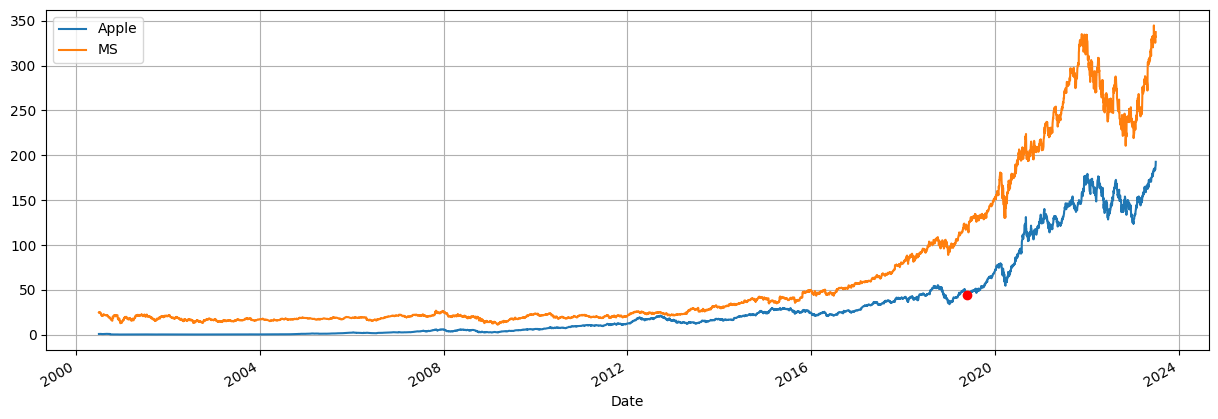

In [58]:
import matplotlib.pyplot as plt

# visualise a couple of time series and point out the value
series = [('AAPL','Close'), ('MSFT', 'Close')]
ax = data[series].plot(figsize=(15,5), grid=True)
ax.legend(['Apple', 'MS'])
show_value = data.loc[date, ('AAPL', 'Close')]
ax.plot([date], [show_value], marker='o', color='r')
# more on visualisetion with low-level control se https://matplotlib.org/users
# for making interactive plots se https://plotly.com/python/getting-started 
plt.show()

## Assignment
Now that you've read the Pandas documentation and have learned how to manipulate financial data, your task is to analyze the 84 downloaded stock datasets. 

Specifically, **identify the stock that experienced the largest single-day High-Low absolute price difference**.

- What is the name of the company?
- On what date did this occur?
- What was the *percentage difference* of this daily High-Low fluctuation?

In [59]:
# Your code goes here.
data.info

<bound method DataFrame.info of Ticker                           NOK                                   \
Price                           Open       High        Low      Close   
Date                                                                    
2000-07-03 00:00:00+00:00  25.595835  26.062345  25.378131  25.937943   
2000-07-05 00:00:00+00:00  26.373360  26.373360  24.631723  24.631723   
2000-07-06 00:00:00+00:00  25.315930  26.000145  25.098226  25.875742   
2000-07-07 00:00:00+00:00  26.684360  27.057568  26.093448  26.870964   
2000-07-10 00:00:00+00:00  27.026473  27.275278  26.248957  26.248957   
...                              ...        ...        ...        ...   
2023-06-26 00:00:00+00:00   3.838784   3.867360   3.829258   3.829258   
2023-06-27 00:00:00+00:00   3.867360   3.934039   3.848309   3.924513   
2023-06-28 00:00:00+00:00   3.953090   3.972141   3.934039   3.943564   
2023-06-29 00:00:00+00:00   3.962615   3.972141   3.914988   3.953090   
2023-06-30 00:00:00

In [60]:
# Your code goes here.
data.head()

Ticker                           NOK                                   \
Price                           Open       High        Low      Close   
Date                                                                    
2000-07-03 00:00:00+00:00  25.595835  26.062345  25.378131  25.937943   
2000-07-05 00:00:00+00:00  26.373360  26.373360  24.631723  24.631723   
2000-07-06 00:00:00+00:00  25.315930  26.000145  25.098226  25.875742   
2000-07-07 00:00:00+00:00  26.684360  27.057568  26.093448  26.870964   
2000-07-10 00:00:00+00:00  27.026473  27.275278  26.248957  26.248957   

Ticker                                    LRCX                        \
Price                        Volume       Open       High        Low   
Date                                                                   
2000-07-03 00:00:00+00:00   7377700  32.579945  33.982393  31.932661   
2000-07-05 00:00:00+00:00  10443100  31.986599  32.364181  27.617434   
2000-07-06 00:00:00+00:00   8445200  28.858072  30.692043  28.480490   
2000-07-07 00:00:00+00:00   9552700  32.040547  32.148427  30.907800   
2000-07-10 00:00:00+00:00   6555700  31.555072  33.011460  31.555072   

Ticker                                         ...       INTC             \
Price                          Close   Volume  ...       Open       High   
Date                                           ...                         
2000-07-03 00:00:00+00:00  33.820572  1015200  ...  38.116460  38.897972   
2000-07-05 00:00:00+00:00  27.941076  6663000  ...  37.832274  38.223029   
2000-07-06 00:00:00+00:00  30.314461  4346000  ...  37.370470  38.880208   
2000-07-07 00:00:00+00:00  31.609024  3907200  ...  39.146631  39.750526   
2000-07-10 00:00:00+00:00  31.824774  3736300  ...  39.146637  39.786055   

Ticker                                                         NVDA            \
Price                            Low      Close    Volume      Open      High   
Date                                                                            
2000-07-03 00:00:00+00:00  38.001010  38.897972  15083800  0.244594  0.252237   
2000-07-05 00:00:00+00:00  37.334948  37.405994  42005200  0.232651  0.233129   
2000-07-06 00:00:00+00:00  37.104045  38.826923  44906200  0.208765  0.228829   
2000-07-07 00:00:00+00:00  38.684828  39.590672  37286800  0.229307  0.233129   
2000-07-10 00:00:00+00:00  38.933497  39.164398  31349400  0.218558  0.239339   

Ticker                                                    
Price                           Low     Close     Volume  
Date                                                      
2000-07-03 00:00:00+00:00  0.231217  0.233607  232680000  
2000-07-05 00:00:00+00:00  0.201599  0.208526  777936000  
2000-07-06 00:00:00+00:00  0.203748  0.221186  603936000  
2000-07-07 00:00:00+00:00  0.217841  0.222380  346560000  
2000-07-10 00:00:00+00:00  0.216409  0.233845  351264000  

[5 rows x 420 columns]

In [61]:
data.tail(3)

Ticker                          NOK                                          \
Price                          Open      High       Low     Close    Volume   
Date                                                                          
2023-06-28 00:00:00+00:00  3.953090  3.972141  3.934039  3.943564  17131200   
2023-06-29 00:00:00+00:00  3.962615  3.972141  3.914988  3.953090  24049700   
2023-06-30 00:00:00+00:00  3.962615  3.981667  3.943564  3.962615  13933800   

Ticker                           LRCX                                      \
Price                            Open        High         Low       Close   
Date                                                                        
2023-06-28 00:00:00+00:00  633.774930  643.360918  629.793949  635.943665   
2023-06-29 00:00:00+00:00  641.330741  641.608051  629.823591  634.141235   
2023-06-30 00:00:00+00:00  638.072760  642.568649  632.705352  636.617004   

Ticker                              ...       INTC                        \
Price                       Volume  ...       Open       High        Low   
Date                                ...                                    
2023-06-28 00:00:00+00:00  1180600  ...  32.938616  33.134622  32.370200   
2023-06-29 00:00:00+00:00  1402300  ...  32.674012  32.674012  31.840993   
2023-06-30 00:00:00+00:00  1086000  ...  32.693611  32.889616  32.497605   

Ticker                                               NVDA             \
Price                          Close    Volume       Open       High   
Date                                                                   
2023-06-28 00:00:00+00:00  32.899414  33906900  40.647830  41.832477   
2023-06-29 00:00:00+00:00  32.252602  38313000  41.545560  41.587547   
2023-06-30 00:00:00+00:00  32.772011  33798400  41.667525  42.537264   

Ticker                                                      
Price                            Low      Close     Volume  
Date                                                        
2023-06-28 00:00:00+00:00  40.505875  41.104694  582639000  
2023-06-29 00:00:00+00:00  40.587846  40.809780  380514000  
2023-06-30 00:00:00+00:00  41.488578  42.289337  501148000  

[3 rows x 420 columns]

In [62]:
data.columns

MultiIndex([( 'NOK',   'Open'),
            ( 'NOK',   'High'),
            ( 'NOK',    'Low'),
            ( 'NOK',  'Close'),
            ( 'NOK', 'Volume'),
            ('LRCX',   'Open'),
            ('LRCX',   'High'),
            ('LRCX',    'Low'),
            ('LRCX',  'Close'),
            ('LRCX', 'Volume'),
            ...
            ('INTC',   'Open'),
            ('INTC',   'High'),
            ('INTC',    'Low'),
            ('INTC',  'Close'),
            ('INTC', 'Volume'),
            ('NVDA',   'Open'),
            ('NVDA',   'High'),
            ('NVDA',    'Low'),
            ('NVDA',  'Close'),
            ('NVDA', 'Volume')],
           names=['Ticker', 'Price'], length=420)

In [63]:
print(data.index.max())
print(data.index.min())

2023-06-30 00:00:00+00:00
2000-07-03 00:00:00+00:00


In [64]:
# Calculate the difference between High and Low prices for each stock on each day
high_low_diff = data.xs('High', level=1, axis=1) - data.xs('Low', level=1, axis=1)

# Find the maximum difference for each stock
max_diff = high_low_diff.max().max()

# Identify the stock with the largest single-day High-Low difference
max_diff_stock = high_low_diff.max().idxmax()

print(f"The stock with the largest single-day High-Low difference is: {max_diff_stock}")


The stock with the largest single-day High-Low difference is: FICO


In [65]:
# Find the date when the maximum difference occurred for the identified stock
max_diff_date = high_low_diff[max_diff_stock].idxmax()

print(f"The date when this occurred: {max_diff_date}")


The date when this occurred: 2022-01-28 00:00:00+00:00


In [66]:
# Calculate the High-Low percentage difference on the identified date for the identified stock
max_diff_percentage = (high_low_diff.loc[max_diff_date, max_diff_stock] / data.loc[max_diff_date, (max_diff_stock, 'Low')]) * 100

print(f"The percentage difference of this daily High-Low fluctuation: {max_diff_percentage:.2f}%")


The percentage difference of this daily High-Low fluctuation: 16.74%


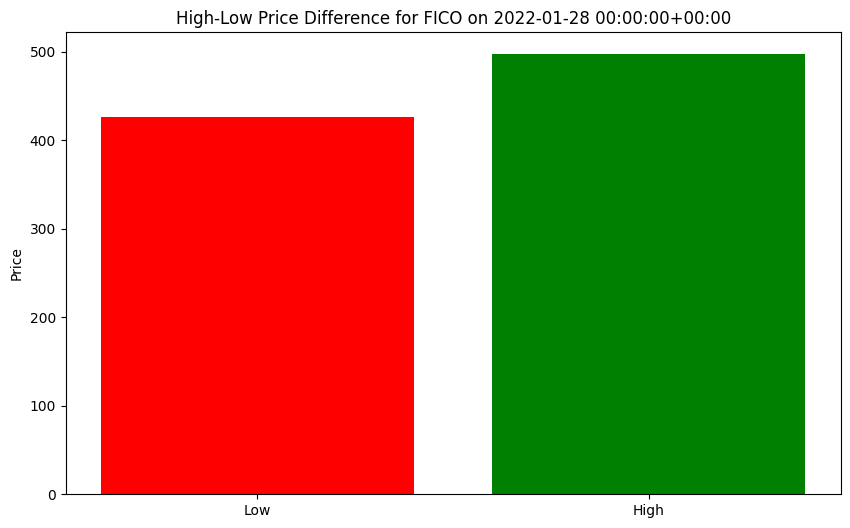

In [67]:
import matplotlib.pyplot as plt

# Get the High and Low prices for the identified stock on the specific date
high_price = data.loc[max_diff_date, (max_diff_stock, 'High')]
low_price = data.loc[max_diff_date, (max_diff_stock, 'Low')]

# Plot the High and Low prices
plt.figure(figsize=(10, 6))

# Bar plot showing the High-Low difference
plt.bar(['Low', 'High'], [low_price, high_price], color=['red', 'green'])

# Adding labels and title
plt.title(f"High-Low Price Difference for {max_diff_stock} on {max_diff_date}")
plt.ylabel("Price")

# Show the plot
plt.show()
